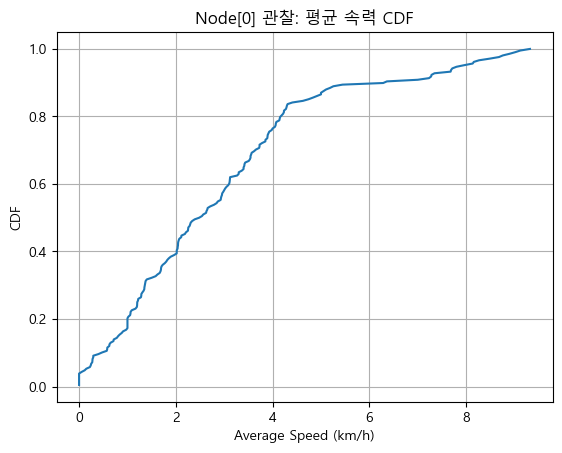

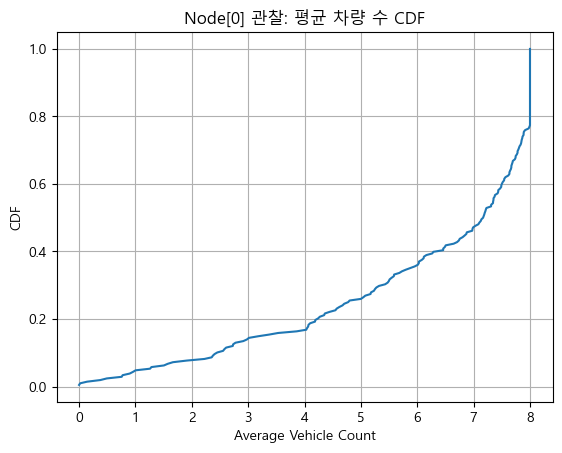

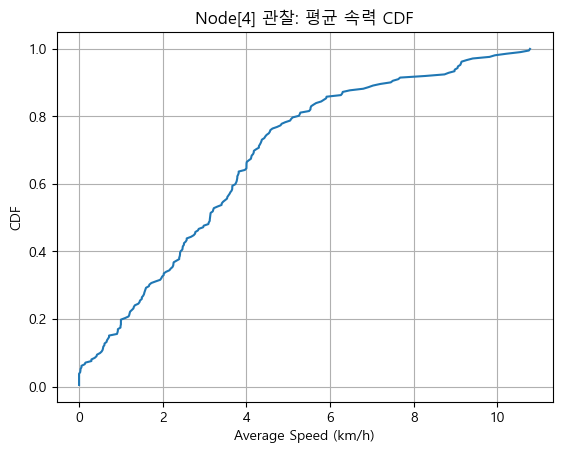

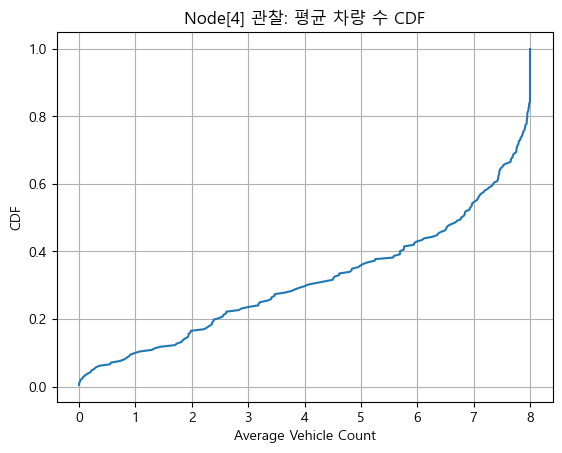

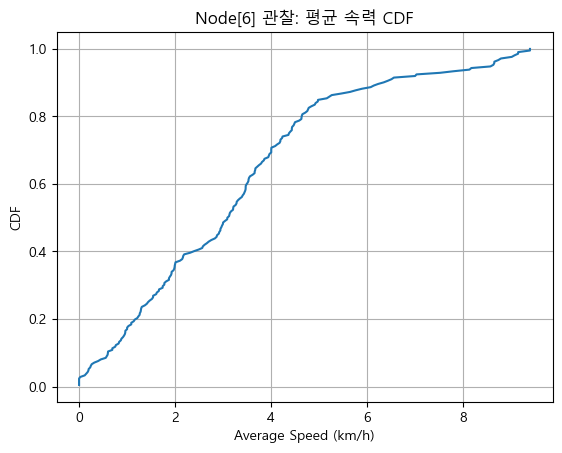

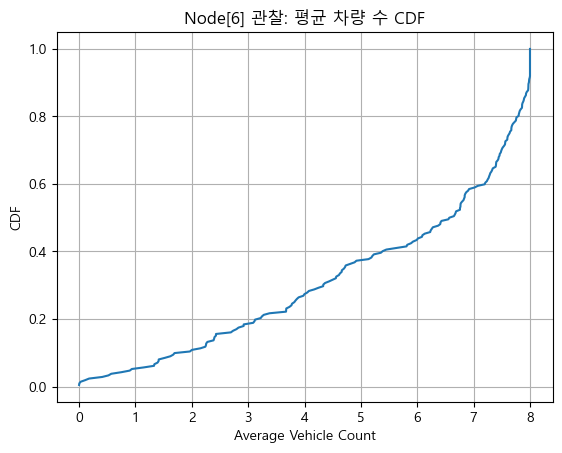

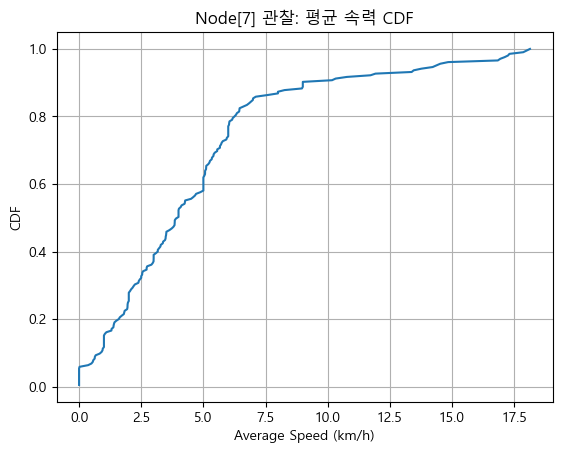

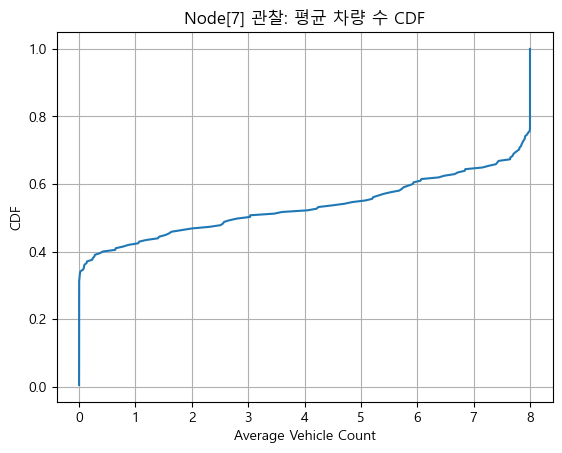

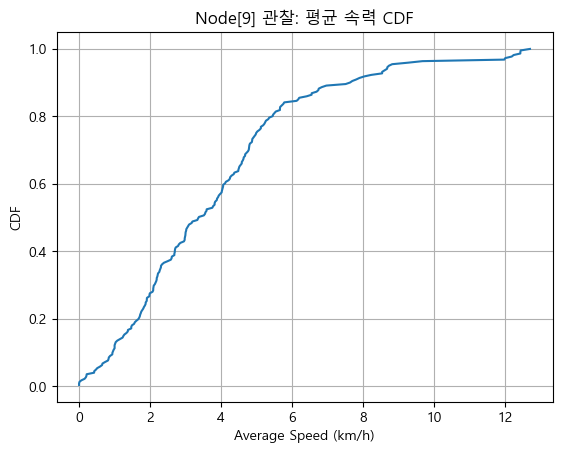

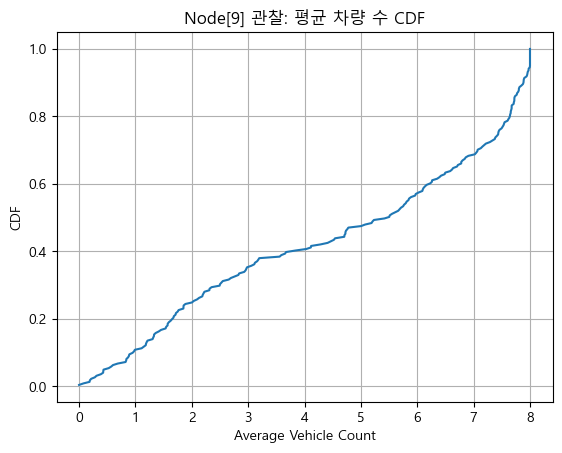

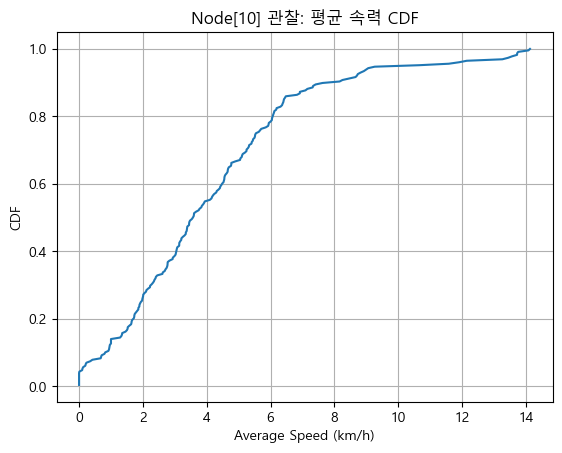

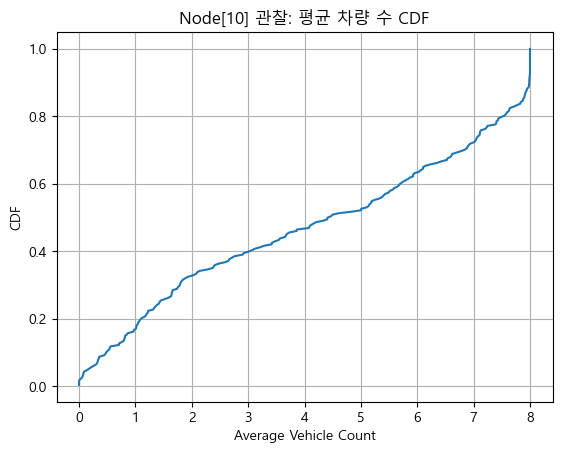

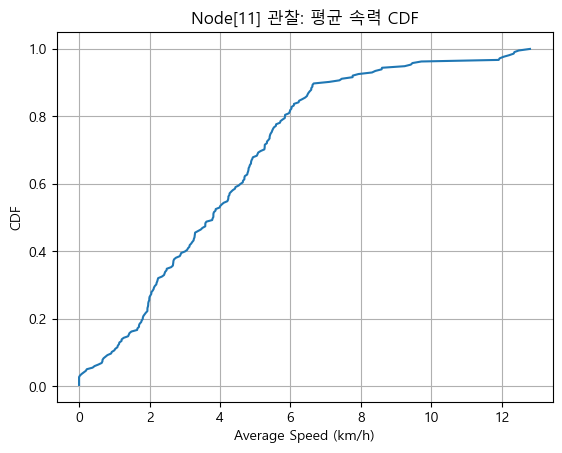

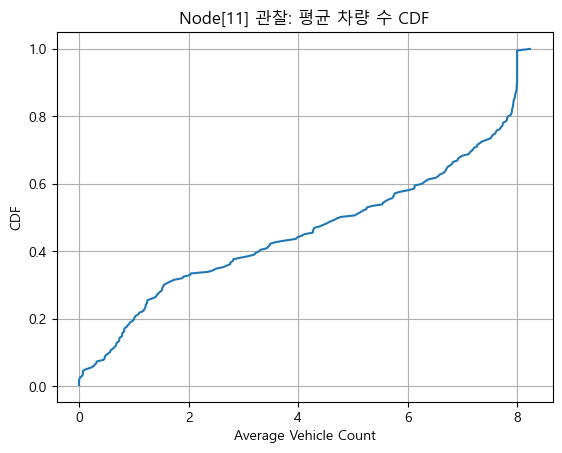

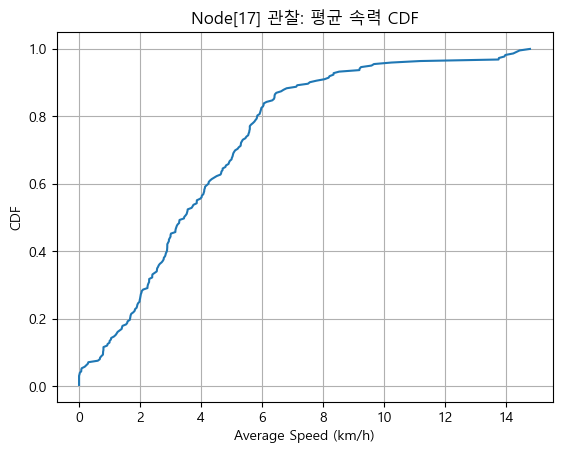

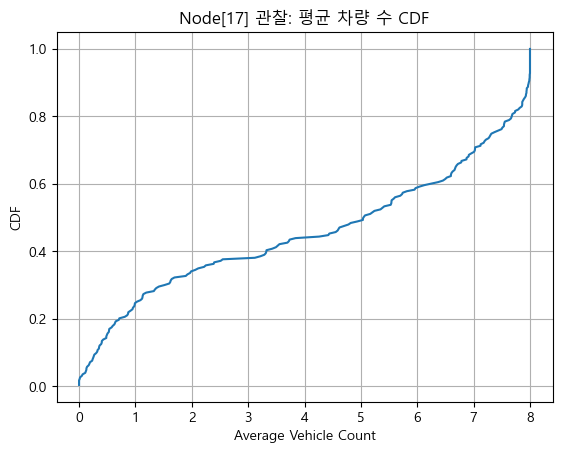

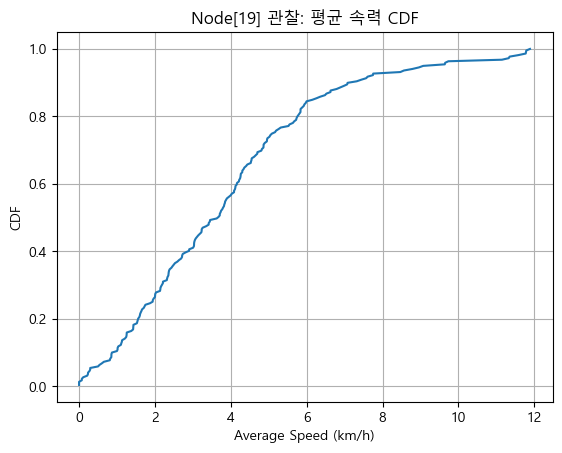

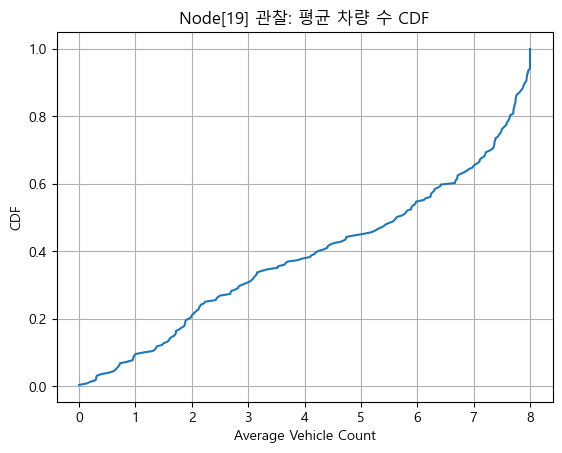

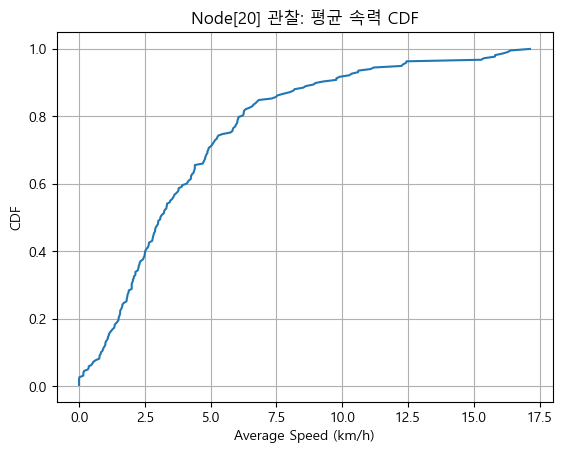

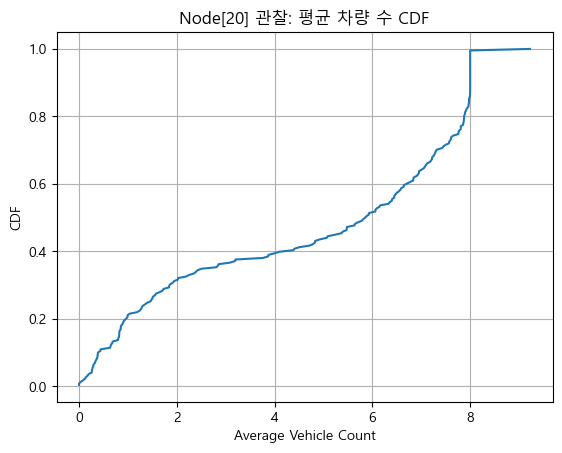

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pwdP = "/기존"
pwdD = "/고밀도"
pwdS = "/고속"
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Result_V02" + pwdP + pwdS + pwdD

node_list = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]

summary = {}
all_node_speed_cdf = {}
all_node_vehicle_cdf = {}

def get_last_float(filepath):
    if not os.path.exists(filepath):
        return np.nan
    with open(filepath, 'r') as f:
        lines = f.readlines()
        if not lines:
            return np.nan
        try:
            return float(lines[-1].split(":")[-1].strip())
        except:
            return np.nan

for node_id in node_list:
    node_path = os.path.join(base_path, f"{node_id}")
    vehicle_file = os.path.join(node_path, "vehicle_status.csv")

    avg_speed = avg_density = np.nan
    pdr = np.nan
    rreq_count = 0
    linkbreak_count = 0

    if os.path.exists(vehicle_file):
        df = pd.read_csv(vehicle_file, header=None)
        if df.shape[1] >= 5:
            df.columns = ['time', 'node', 'veh_count', 'speed', 'density']
            avg_speed = df['speed'].mean()
            avg_density = df['density'].mean()

            grouped = df.groupby('node').agg({
                'speed': 'mean',
                'veh_count': 'mean'
            }).reset_index()
            all_node_speed_cdf[node_id] = grouped['speed'].tolist()
            all_node_vehicle_cdf[node_id] = grouped['veh_count'].tolist()

    pdr = get_last_float(os.path.join(node_path, "PDR.txt"))

    rreq_file = os.path.join(node_path, "rreqCount.txt")
    rreq_count = sum(1 for _ in open(rreq_file)) if os.path.exists(rreq_file) else 0

    lb_file = os.path.join(node_path, "LinkBreakCount.txt")
    linkbreak_count = sum(1 for _ in open(lb_file)) if os.path.exists(lb_file) else 0

    summary[node_id] = {
        'Node': node_id,
        'PDR': pdr,
        'RREQ_Count': rreq_count,
        'LinkBreak_Count': linkbreak_count,
        'AvgSpeed': avg_speed,
        'AvgDensity': avg_density
    }

df_summary = pd.DataFrame(summary.values())
df_summary.to_csv("summary_result.csv", index=False)

def plot_cdf(data_list, title, xlabel):
    data = np.array(data_list)
    data = data[~np.isnan(data)]
    if len(data) == 0:
        print(f"[경고] {title} 시각화할 데이터 없음")
        return
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.figure()
    plt.plot(sorted_data, yvals, linestyle='-')
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.title(title)
    plt.grid(True)
    plt.show()

for node_id in node_list:
    if node_id in all_node_speed_cdf:
        plot_cdf(all_node_speed_cdf[node_id], f"Node[{node_id}] 관찰: 평균 속력 CDF", "Average Speed (km/h)")
    if node_id in all_node_vehicle_cdf:
        plot_cdf(all_node_vehicle_cdf[node_id], f"Node[{node_id}] 관찰: 평균 차량 수 CDF", "Average Vehicle Count")


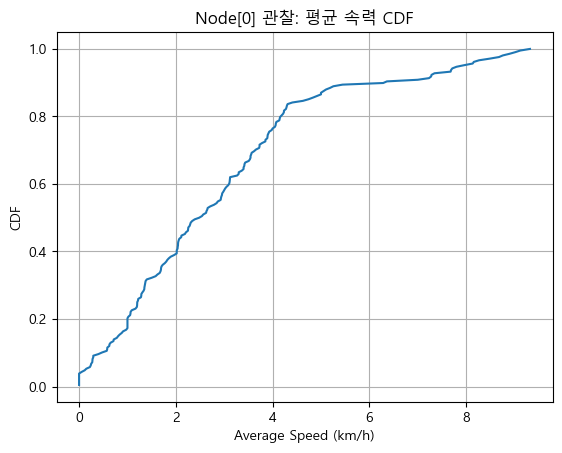

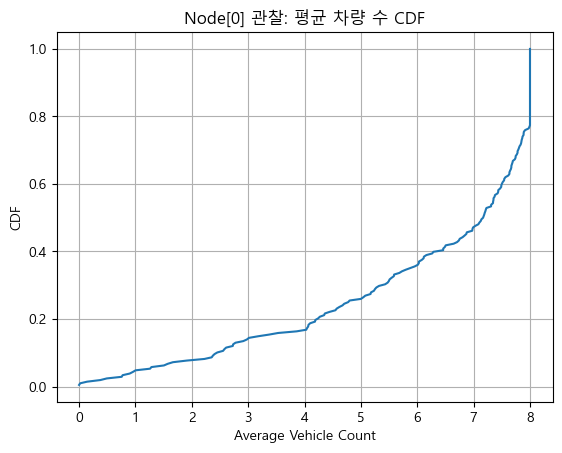

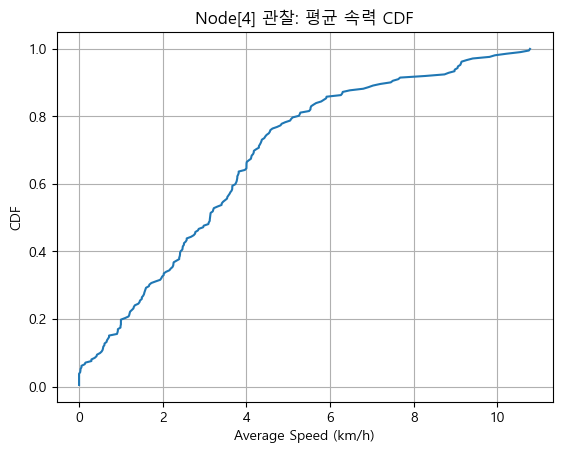

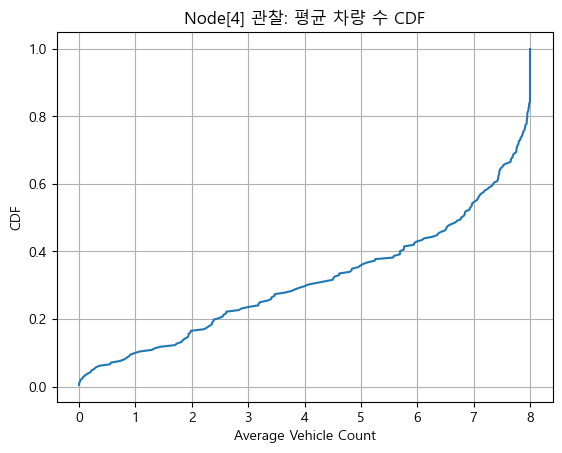

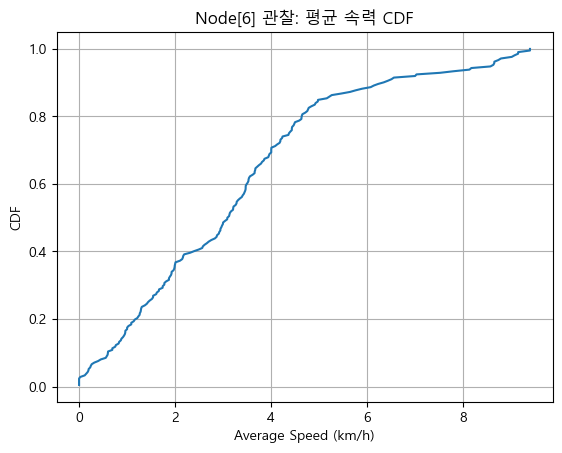

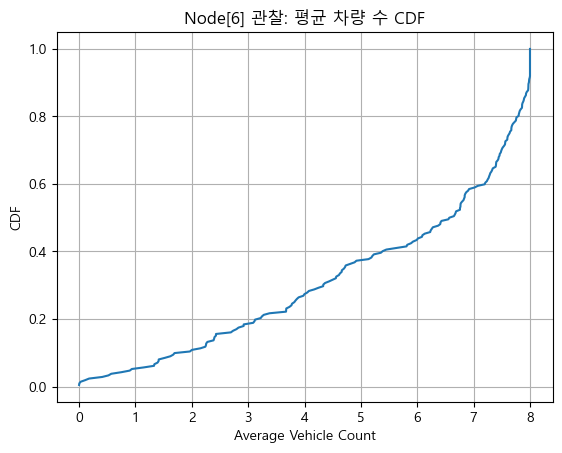

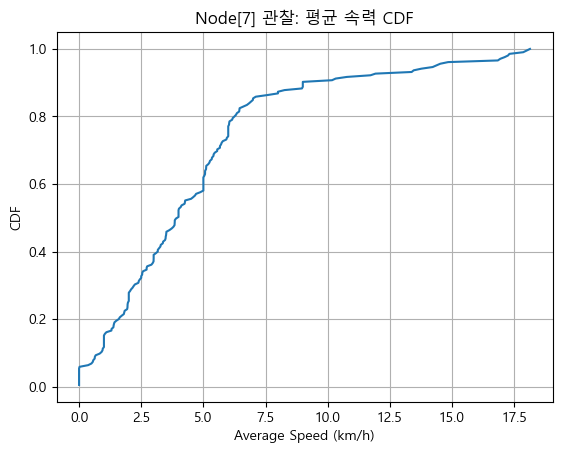

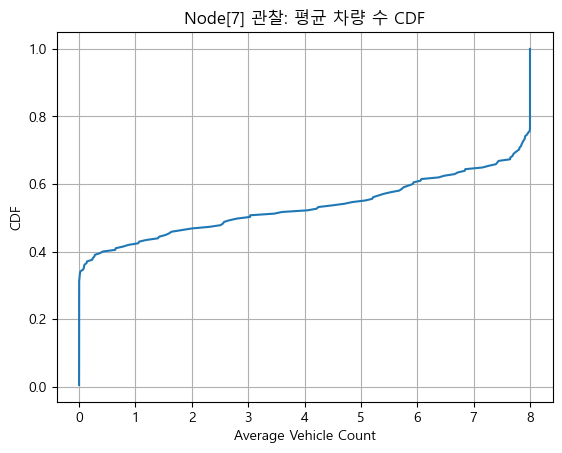

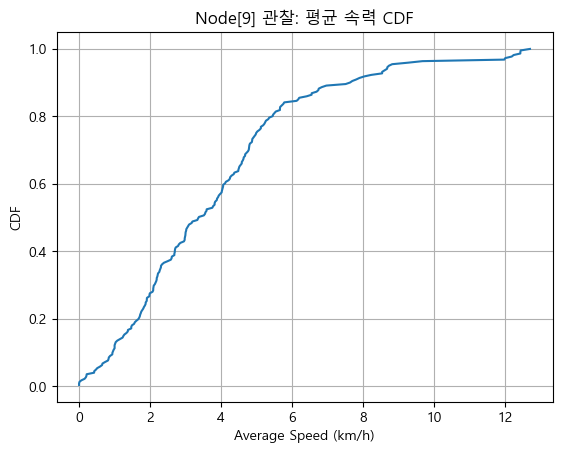

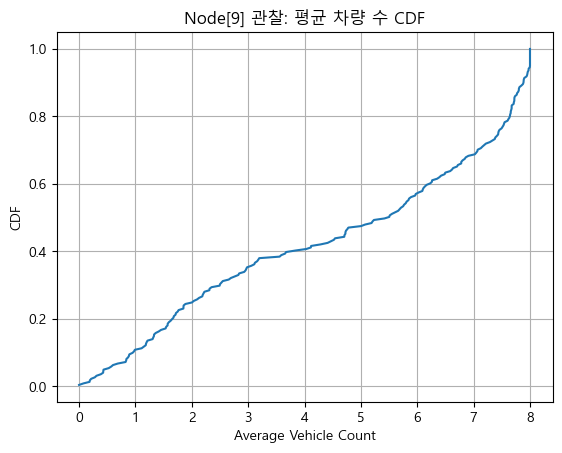

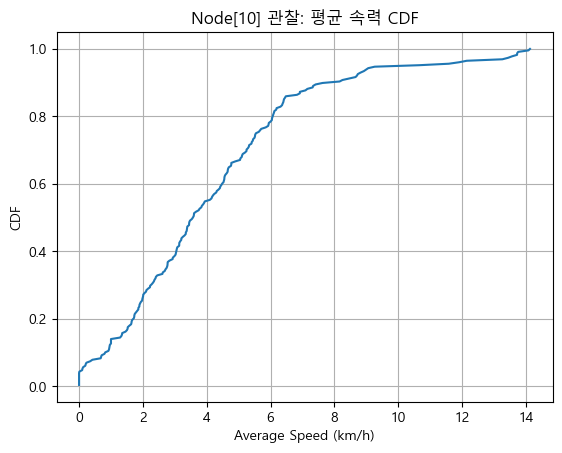

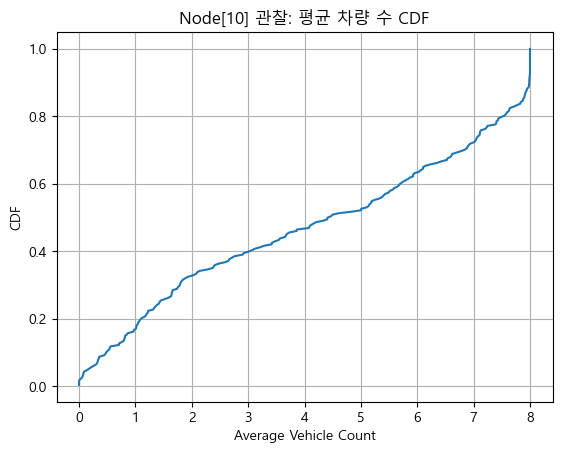

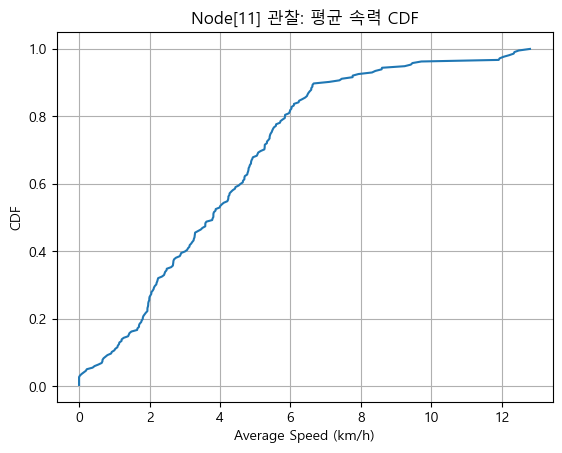

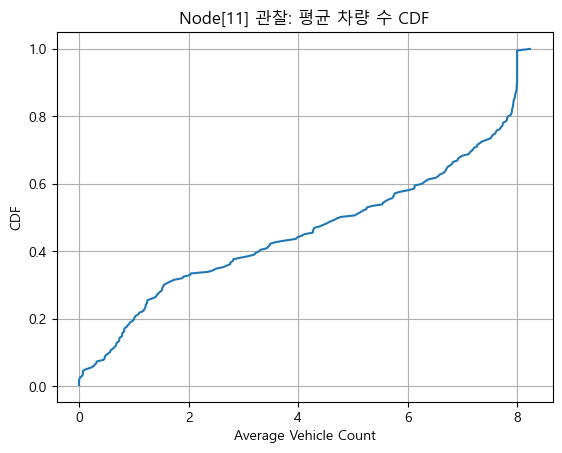

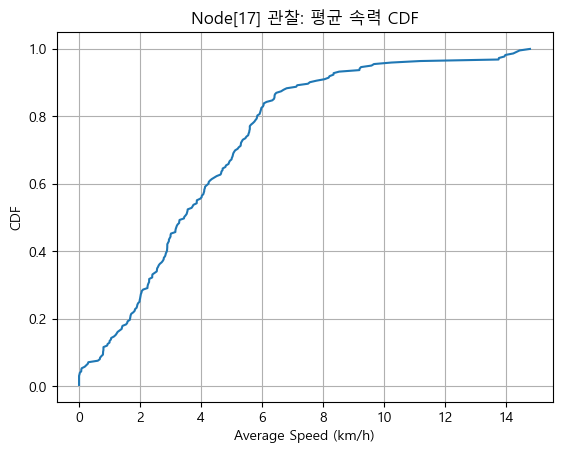

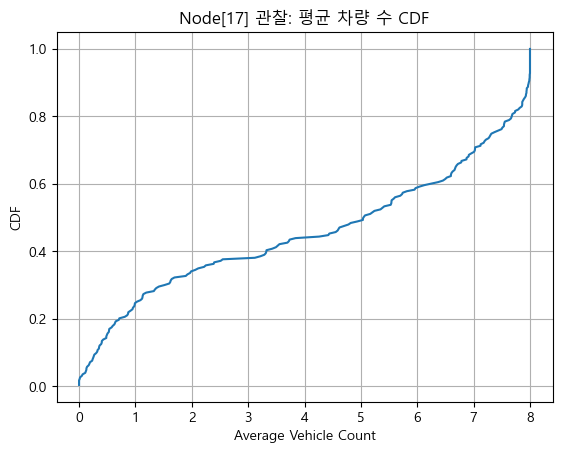

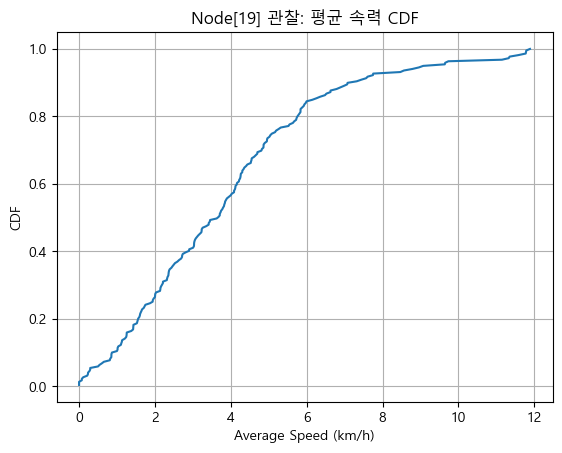

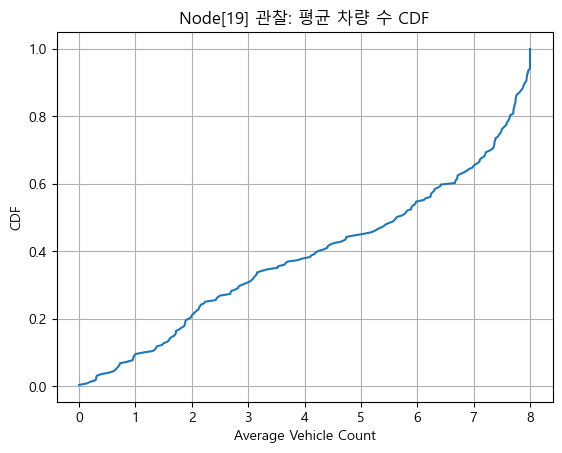

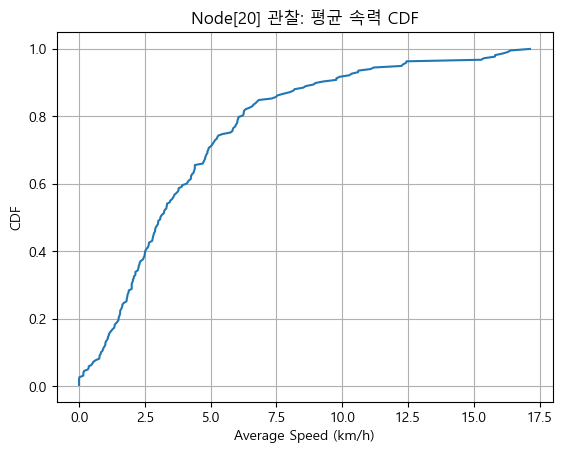

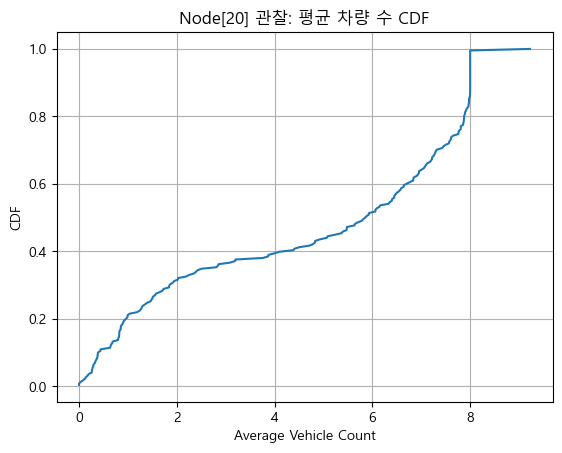

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

pwdP = "/기존"
pwdD = "/저밀도"
pwdS = "/고속"
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/Result_V02" + pwdP + pwdS + pwdD

node_list = [0, 4, 6, 7, 9, 10, 11, 17, 19, 20]

summary = {}
all_node_speed_cdf = {}
all_node_vehicle_cdf = {}

def get_last_float(filepath):
    if not os.path.exists(filepath):
        return np.nan
    with open(filepath, 'r') as f:
        lines = f.readlines()
        if not lines:
            return np.nan
        try:
            return float(lines[-1].split(":")[-1].strip())
        except:
            return np.nan

for node_id in node_list:
    node_path = os.path.join(base_path, f"{node_id}")
    vehicle_file = os.path.join(node_path, "vehicle_status.csv")

    avg_speed = avg_density = np.nan
    pdr = np.nan
    rreq_count = 0
    linkbreak_count = 0

    if os.path.exists(vehicle_file):
        df = pd.read_csv(vehicle_file, header=None)
        if df.shape[1] >= 5:
            df.columns = ['time', 'node', 'veh_count', 'speed', 'density']
            avg_speed = df['speed'].mean()
            avg_density = df['density'].mean()

            grouped = df.groupby('node').agg({
                'speed': 'mean',
                'veh_count': 'mean'
            }).reset_index()
            all_node_speed_cdf[node_id] = grouped['speed'].tolist()
            all_node_vehicle_cdf[node_id] = grouped['veh_count'].tolist()

    pdr = get_last_float(os.path.join(node_path, "PDR.txt"))

    rreq_file = os.path.join(node_path, "rreqCount.txt")
    rreq_count = sum(1 for _ in open(rreq_file)) if os.path.exists(rreq_file) else 0

    lb_file = os.path.join(node_path, "LinkBreakCount.txt")
    linkbreak_count = sum(1 for _ in open(lb_file)) if os.path.exists(lb_file) else 0

    summary[node_id] = {
        'Node': node_id,
        'PDR': pdr,
        'RREQ_Count': rreq_count,
        'LinkBreak_Count': linkbreak_count,
        'AvgSpeed': avg_speed,
        'AvgDensity': avg_density
    }

df_summary = pd.DataFrame(summary.values())
df_summary.to_csv("summary_result.csv", index=False)

def plot_cdf(data_list, title, xlabel):
    data = np.array(data_list)
    data = data[~np.isnan(data)]
    if len(data) == 0:
        print(f"[경고] {title} 시각화할 데이터 없음")
        return
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.figure()
    plt.plot(sorted_data, yvals, linestyle='-')
    plt.xlabel(xlabel)
    plt.ylabel('CDF')
    plt.title(title)
    plt.grid(True)
    plt.show()

for node_id in node_list:
    if node_id in all_node_speed_cdf:
        plot_cdf(all_node_speed_cdf[node_id], f"Node[{node_id}] 관찰: 평균 속력 CDF", "Average Speed (km/h)")
    if node_id in all_node_vehicle_cdf:
        plot_cdf(all_node_vehicle_cdf[node_id], f"Node[{node_id}] 관찰: 평균 차량 수 CDF", "Average Vehicle Count")
